# IMPORT LIBRARIES


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import warnings
warnings.filterwarnings("ignore")

# LOADING DATA

In [2]:
file_path = r"C:\Users\muham\OneDrive\Desktop\Krish Naik\notebooks\data\StudentsPerformance.csv"
#target_columns = ['math score', 'reading score', 'writing score']
target_columns = ['math score']
target_columns1 = ['reading score']
target_columns2 = ['writing score']


In [3]:
df = pd.read_csv(file_path)


In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Machine Learning Model Training


==================== Model Training for 'math score' ====================

----- Predicting: math score -----

Model: Random Forest

Model: Gradient Boosting

Model: XGBoost

Model: CatBoost

Model: AdaBoost

Model: Decision Tree

Model: Linear Regression

Model: Ridge

Model: Lasso

Summary Table for math score


,Target,Model,MAE,RMSE,R²,CV R²
0,math score,Random Forest,4.70,6.03,0.85,0.84
1,math score,Gradient Boosting,4.30,5.58,0.87,0.86
2,math score,XGBoost,5.10,6.60,0.82,0.81
3,math score,CatBoost,4.59,6.03,0.85,0.85
4,math score,AdaBoost,4.68,6.01,0.85,0.83
5,math score,Decision Tree,6.24,7.84,0.75,0.70
6,math score,Linear Regression,4.21,5.39,0.88,0.87
7,math score,Ridge,4.21,5.39,0.88,0.87
8,math score,Lasso,5.16,6.52,0.83,0.81


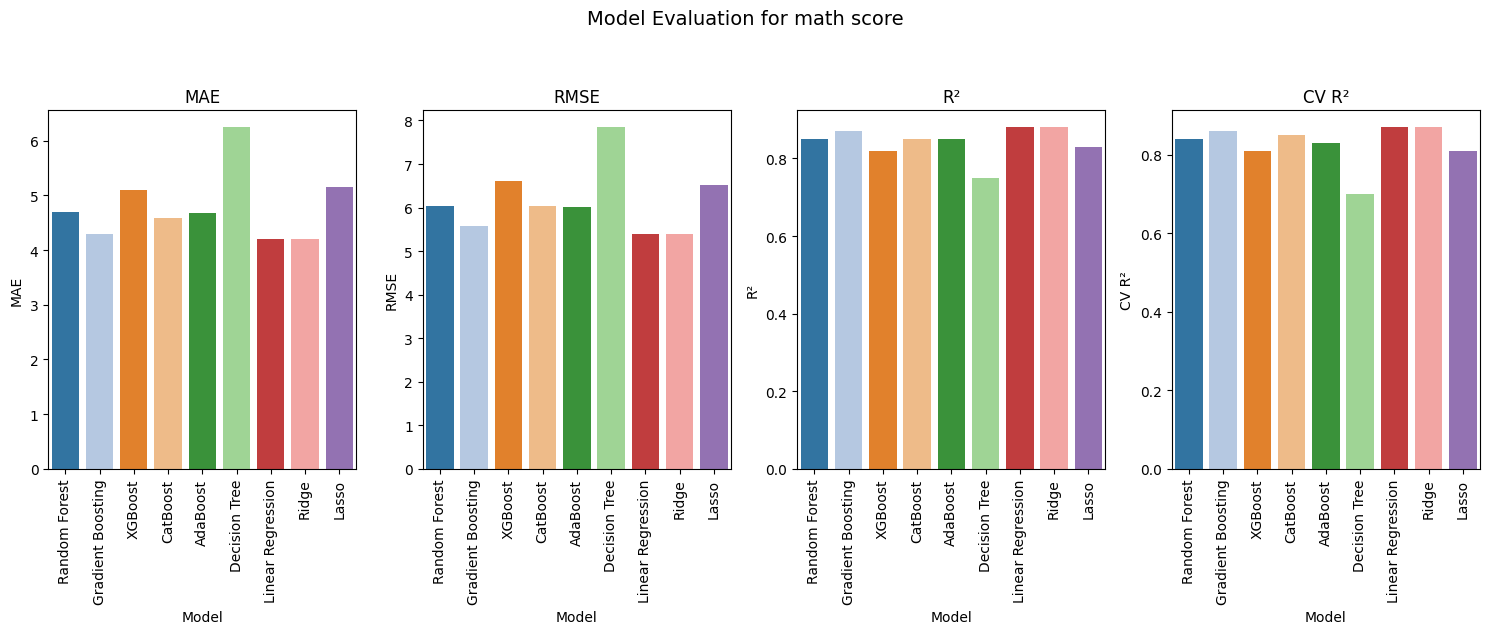

In [5]:
print("\n" + "="*20 + " Model Training for 'math score' " + "="*20)

# Identify column types
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).drop(columns=target_columns).columns.tolist()

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Feature-target split
X = df.drop(columns=target_columns)

for target in target_columns:
    print(f"\n----- Predicting: {target} -----")
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    models = [
        ("Random Forest", RandomForestRegressor(random_state=42)),
        ("Gradient Boosting", GradientBoostingRegressor(random_state=42)),
        ("XGBoost", XGBRegressor(random_state=42, verbosity=0)),
        ("CatBoost", CatBoostRegressor(verbose=0, random_state=42)),
        ("AdaBoost", AdaBoostRegressor(random_state=42)),
        ("Decision Tree", DecisionTreeRegressor(random_state=42)),
        ("Linear Regression", LinearRegression()),
        ("Ridge", Ridge()),
        ("Lasso", Lasso())
    ]

    results_ml = []

    for name, model in models:
        print(f"\nModel: {name}")
        pipe = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
        pipe.fit(X_train, y_train)
        preds = pipe.predict(X_test)
        mae = mean_absolute_error(y_test, preds)
        rmse = np.sqrt(mean_squared_error(y_test, preds))
        r2 = r2_score(y_test, preds)

        # Cross-validation
        cv_scores = cross_val_score(pipe, X, y, cv=5, scoring='r2')
        cv_mean = round(np.mean(cv_scores), 2)

        results_ml.append({
            'Target': target,
            'Model': name,
            'MAE': round(mae, 2),
            'RMSE': round(rmse, 2),
            'R²': round(r2, 2),
            'CV R²': cv_mean
        })

    # Summary Table per target
    eval_df = pd.DataFrame(results_ml)
    print(f"\nSummary Table for {target}")
    display(eval_df)

    # Performance Comparison Plot
    plt.figure(figsize=(15, 6))
    metrics = ['MAE', 'RMSE', 'R²', 'CV R²']
    for i, metric in enumerate(metrics):
        plt.subplot(1, 4, i + 1)
        sns.barplot(data=eval_df, x='Model', y=metric, palette='tab20')
        plt.title(metric)
        plt.xticks(rotation=90)
        plt.tight_layout()

    plt.suptitle(f"Model Evaluation for {target}", fontsize=14, y=1.05)
    plt.tight_layout()
    plt.show()


==================== Model Training for 'reading score' ====================

----- Predicting: reading score -----

Model: Random Forest

Model: Gradient Boosting

Model: XGBoost

Model: CatBoost

Model: AdaBoost

Model: Decision Tree

Model: Linear Regression

Model: Ridge

Model: Lasso

Summary Table for reading score


,Target,Model,MAE,RMSE,R²,CV R²
0,reading score,Random Forest,3.73,4.55,0.91,0.91
1,reading score,Gradient Boosting,3.62,4.40,0.91,0.92
2,reading score,XGBoost,3.88,4.82,0.90,0.89
3,reading score,CatBoost,3.64,4.51,0.91,0.91
4,reading score,AdaBoost,3.73,4.73,0.90,0.91
5,reading score,Decision Tree,5.17,6.46,0.82,0.83
6,reading score,Linear Regression,3.49,4.31,0.92,0.92
7,reading score,Ridge,3.49,4.30,0.92,0.92
8,reading score,Lasso,3.69,4.63,0.91,0.91


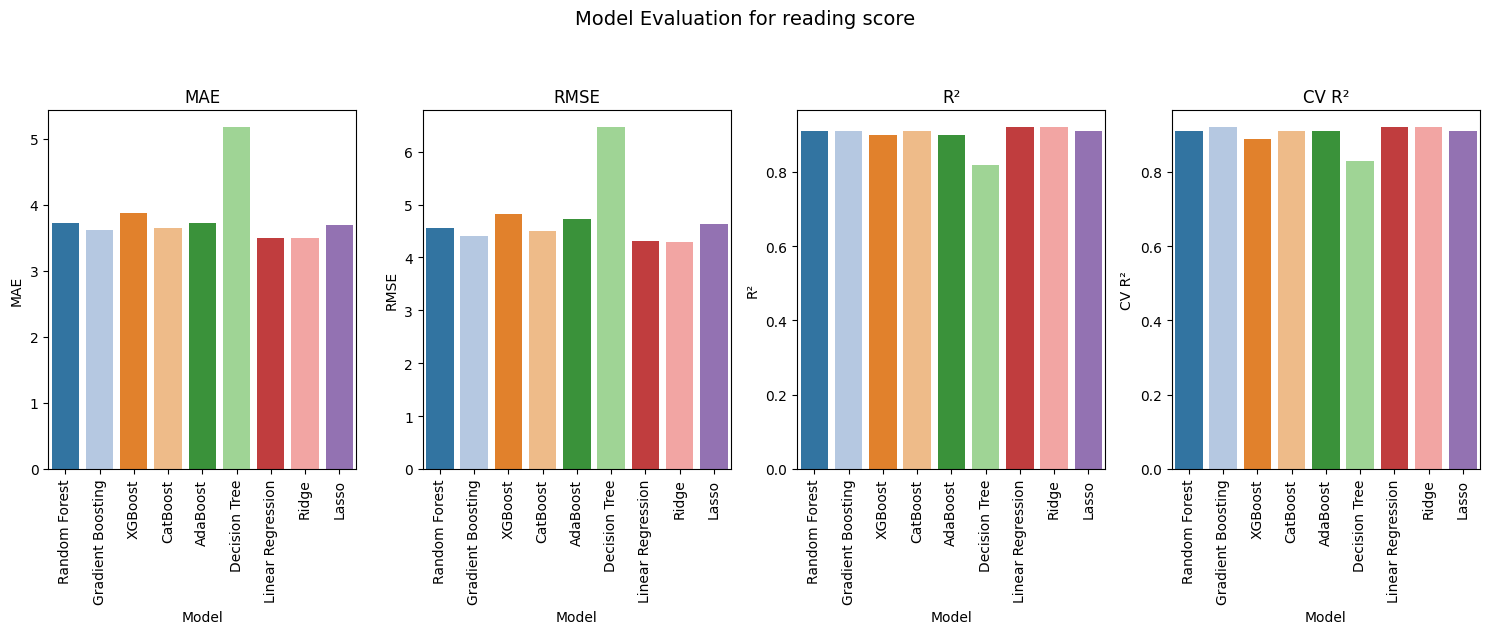

In [7]:
print("\n" + "="*20 + " Model Training for 'reading score' " + "="*20)

# Identify column types
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).drop(columns=target_columns1).columns.tolist()

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Feature-target split
X = df.drop(columns=target_columns1)

for target in target_columns1:
    print(f"\n----- Predicting: {target} -----")
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    models = [
        ("Random Forest", RandomForestRegressor(random_state=42)),
        ("Gradient Boosting", GradientBoostingRegressor(random_state=42)),
        ("XGBoost", XGBRegressor(random_state=42, verbosity=0)),
        ("CatBoost", CatBoostRegressor(verbose=0, random_state=42)),
        ("AdaBoost", AdaBoostRegressor(random_state=42)),
        ("Decision Tree", DecisionTreeRegressor(random_state=42)),
        ("Linear Regression", LinearRegression()),
        ("Ridge", Ridge()),
        ("Lasso", Lasso())
    ]

    results_ml = []

    for name, model in models:
        print(f"\nModel: {name}")
        pipe = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
        pipe.fit(X_train, y_train)
        preds = pipe.predict(X_test)
        mae = mean_absolute_error(y_test, preds)
        rmse = np.sqrt(mean_squared_error(y_test, preds))
        r2 = r2_score(y_test, preds)

        # Cross-validation
        cv_scores = cross_val_score(pipe, X, y, cv=5, scoring='r2')
        cv_mean = round(np.mean(cv_scores), 2)

        results_ml.append({
            'Target': target,
            'Model': name,
            'MAE': round(mae, 2),
            'RMSE': round(rmse, 2),
            'R²': round(r2, 2),
            'CV R²': cv_mean
        })

    # Summary Table per target
    eval_df = pd.DataFrame(results_ml)
    print(f"\nSummary Table for {target}")
    display(eval_df)

    # Performance Comparison Plot
    plt.figure(figsize=(15, 6))
    metrics = ['MAE', 'RMSE', 'R²', 'CV R²']
    for i, metric in enumerate(metrics):
        plt.subplot(1, 4, i + 1)
        sns.barplot(data=eval_df, x='Model', y=metric, palette='tab20')
        plt.title(metric)
        plt.xticks(rotation=90)
        plt.tight_layout()

    plt.suptitle(f"Model Evaluation for {target}", fontsize=14, y=1.05)
    plt.tight_layout()
    plt.show()


==================== Model Training for 'writing score' ====================

----- Predicting: writing score -----

Model: Random Forest

Model: Gradient Boosting

Model: XGBoost

Model: CatBoost

Model: AdaBoost

Model: Decision Tree

Model: Linear Regression

Model: Ridge

Model: Lasso

Summary Table for writing score


,Target,Model,MAE,RMSE,R²,CV R²
0,writing score,Random Forest,3.67,4.51,0.92,0.93
1,writing score,Gradient Boosting,3.21,4.04,0.93,0.94
2,writing score,XGBoost,3.56,4.49,0.92,0.93
3,writing score,CatBoost,3.49,4.48,0.92,0.94
4,writing score,AdaBoost,3.62,4.60,0.91,0.92
5,writing score,Decision Tree,4.42,5.63,0.87,0.87
6,writing score,Linear Regression,3.20,3.86,0.94,0.95
7,writing score,Ridge,3.20,3.86,0.94,0.95
8,writing score,Lasso,3.90,4.92,0.90,0.91


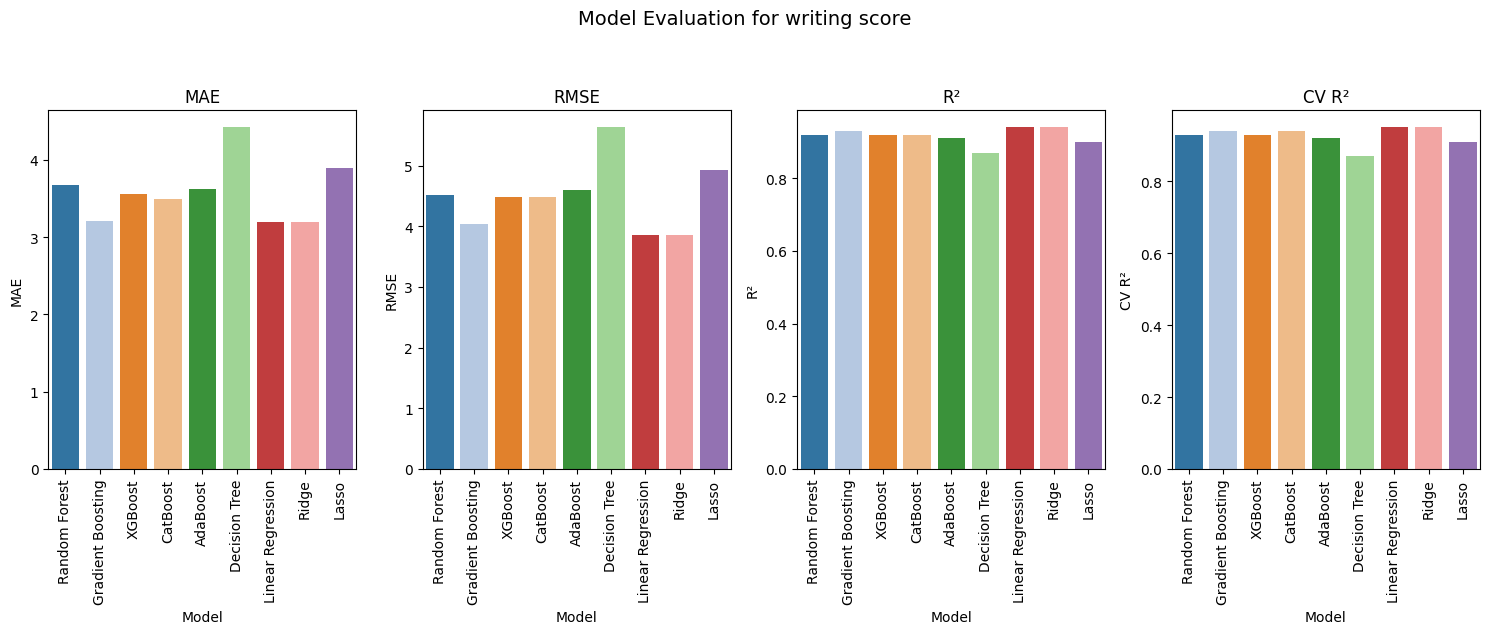

In [8]:
print("\n" + "="*20 + " Model Training for 'writing score' " + "="*20)

# Identify column types
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).drop(columns=target_columns2).columns.tolist()

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Feature-target split
X = df.drop(columns=target_columns2)

for target in target_columns2:
    print(f"\n----- Predicting: {target} -----")
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    models = [
        ("Random Forest", RandomForestRegressor(random_state=42)),
        ("Gradient Boosting", GradientBoostingRegressor(random_state=42)),
        ("XGBoost", XGBRegressor(random_state=42, verbosity=0)),
        ("CatBoost", CatBoostRegressor(verbose=0, random_state=42)),
        ("AdaBoost", AdaBoostRegressor(random_state=42)),
        ("Decision Tree", DecisionTreeRegressor(random_state=42)),
        ("Linear Regression", LinearRegression()),
        ("Ridge", Ridge()),
        ("Lasso", Lasso())
    ]

    results_ml = []

    for name, model in models:
        print(f"\nModel: {name}")
        pipe = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
        pipe.fit(X_train, y_train)
        preds = pipe.predict(X_test)
        mae = mean_absolute_error(y_test, preds)
        rmse = np.sqrt(mean_squared_error(y_test, preds))
        r2 = r2_score(y_test, preds)

        # Cross-validation
        cv_scores = cross_val_score(pipe, X, y, cv=5, scoring='r2')
        cv_mean = round(np.mean(cv_scores), 2)

        results_ml.append({
            'Target': target,
            'Model': name,
            'MAE': round(mae, 2),
            'RMSE': round(rmse, 2),
            'R²': round(r2, 2),
            'CV R²': cv_mean
        })

    # Summary Table per target
    eval_df = pd.DataFrame(results_ml)
    print(f"\nSummary Table for {target}")
    display(eval_df)

    # Performance Comparison Plot
    plt.figure(figsize=(15, 6))
    metrics = ['MAE', 'RMSE', 'R²', 'CV R²']
    for i, metric in enumerate(metrics):
        plt.subplot(1, 4, i + 1)
        sns.barplot(data=eval_df, x='Model', y=metric, palette='tab20')
        plt.title(metric)
        plt.xticks(rotation=90)
        plt.tight_layout()

    plt.suptitle(f"Model Evaluation for {target}", fontsize=14, y=1.05)
    plt.tight_layout()
    plt.show()